## Exercise in Photogrammetry I
## **Ex.5 : Local Operators**
### Hand out: xx.xx.xxxx
### Submission: xx.xx.xxxx 
### Points: 25

## A. Image convolutions

In this task you will learn how to apply local operators in the form of image convolutions.
A convolution *g* of a symmetric 3x3 Kernel *w* with an image *f* is defined as:

$g(i,j)= \sum_{k,l=-1}^1 f(i-k,j-l)\cdot w(k,l)$

In this exercise we will brake down the convolution in multiple steps. This allows for a more intuitive and efficient way by bypassing alot of the indexing and working with matrices.

**Pseudo Code - imageConv(f,w):**
1. *w_s*:= row and columnwise flipped kernel *w* .
2. for each pixel *f(i,j)*:
    1. *N_ij* = N8 neighborhood of the pixel *f(i,j)* (3x3 matrix).
    2. *p = w_s * N_ij*, * denotes the elementwise multiplication
    3. *g(i,j)*= sum(*p*).

**Tasks:**
1. compute the convolution for the following image *f* and kernel *w* by **hand**. Follow the provided pseudo code and write down the results of each step. Scan/ take a photo from the sheet(s) and visualize it. Compute the convolution just for the 2 pixels in the middle (*g(1,1), g(2,1)*). (7 points)

In [12]:
# import all required modules
%matplotlib inline
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

Test Image:
[[0 1 0 2]
 [0 1 3 1]
 [1 0 0 2]]
Test Kernel:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


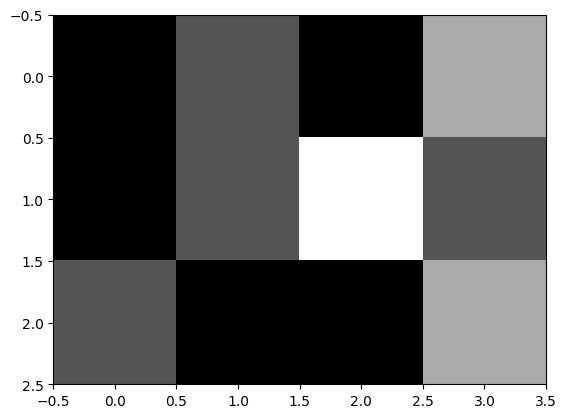

In [13]:
# Image f and Kernel w for A1
f = np.array([[0,1,0,2],[0,1,3,1],[1,0,0,2]])
print('Test Image:')
print(f)

w = np.array([[1,2,3],[4,5,6],[7,8,9]])
print('Test Kernel:')
print(w)
plt.figure()
plt.imshow(f, cmap='gray')
plt.show()

[]

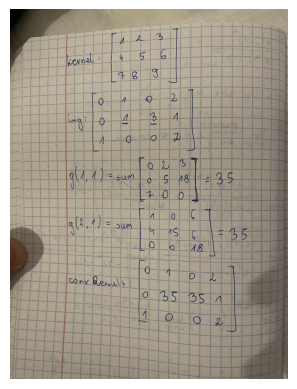

In [14]:
# Plot the result sheet with the answers of A1 here:
from skimage import io, img_as_ubyte

image = io.imread('images/handSolution.jpg')
plt.imshow(image)
plt.axis('off')
plt.plot()

### **Tasks:**
2. write a function ```imageConv(f,w)``` which implements the pseudo code and returns the image after applying the convolution. Compute the convolution for all pixels where the neighborhood is well defined. The border can be set to zero (also called zero padding). (8  points)
3. load the image ```images/house-downsampled.png``` as a grayscale image and visualize it. (1 point)
4. compute the convolution of the image with the following **3x3** kernels and visualize the results. Use your implementation of ```imageConv(f,w)``` for applying the convolution:
    1. Box filter (1 point)
    2. Binominal filter (1 point)
    3. Sobel Operator. Compute the absolute gradient (2 points)
5. compute the convolution of the image with the following **5x5** kernels and visualize the results. Use the function ```ndimage.convolve(...)``` from scipy for applying the convolution. **Hint:** For more information about the function press ```shift + tab``` or look into the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html#scipy.ndimage.convolve).
    1. Box filter (1 point)
    2. Binominal filter (1 point)
6. evaluate the results of the tasks 4 and 5. (3 point)

In [168]:
def imageConv(f: np.ndarray, w: np.ndarray) -> np.ndarray:
    '''
    Performs a convolution on image f, given kernel w.

    Parameters:
    - f (np.ndarray): 2D grayscale image.
    - w (np.ndarray): 2D kernel matrix.

    Returns:
    - np.ndarray: New image after convolution.
    '''

    # Allocate new image.
    convoluted = np.zeros(f.shape, dtype=np.uint8)

    # https://www.youtube.com/watch?v=IESRH-Qhe8w 20:23
    # Local Operators.
    
    # Go through every pixel.
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            # Access neighbors of (i,j) using kernel shape.
            neighbors = f[max(0, i - (w.shape[0] - 1) // 2) : min(i + (w.shape[0] - 1) // 2, f.shape[0] - 1) + 1,
                          max(0, j - (w.shape[1] - 1) // 2) : min(j + (w.shape[1] - 1) // 2, f.shape[1] - 1) + 1]

            if neighbors.shape == w.shape:
               convoluted[i, j] = np.sum(neighbors * w)

    return convoluted

In [169]:
print(imageConv(f, w))

[[ 0  0  0  0]
 [ 0 32 50  0]
 [ 0  0  0  0]]
